In [1]:
import hypernetx as hnx
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import time
import hypernetx.algorithms.contagion as contagion
from hnxwidget import HypernetxWidget

In [8]:
n = 1000 #1000
m = 10000 #10000

hyperedgeList = [random.sample(range(n), k=random.choice([2,3])) for i in range(m)]
H = hnx.Hypergraph(hyperedgeList, static=True)

## Initialize simulation variables
- $\tau$ is a dictionary of the infection rate for each hyperedge size
- $\gamma$ is the healing rate
- $t_{max}$ is the time at which to terminate the simulation if it hasn't already
- $\Delta t$ is the time step size to use for the discrete time algorithm


In [9]:
tau = {2:0.01, 3:0.01}
gamma = 0.01
tmax = 100
dt = 0.1

## Run the SIR epidemic simulations
- The discrete SIR takes fixed steps in time and multiple infection/healing events can happen at each time step.
- The Gillespie SIR algorithm takes steps in time exponentially distributed and at each step forward, a single event occurs
- As $\Delta t\to 0$, the discrete time algorithm converges to the Gillespie algorithm. 

In [10]:
# start = time.time()
# t1, S1, I1, R1 = contagion.discrete_SIR(H, tau, gamma, rho=0.1, tmin=0, tmax=tmax, dt=dt)
# print(time.time() - start)

start = time.time()
t2, S2, I2, R2 = contagion.Gillespie_SIR(H, tau, gamma, rho=0.1, tmin=0, tmax=tmax)
print(time.time() - start)

153.8265552520752


The Gillespie algorithm is much faster in many cases (and more accurate) than discrete-time algorithms because it doesn't consider events that don't happen. Instead, it calculates when the next event will occur and what event (infection, recovery, etc.) it will be.

## Plot of the results
- Dashed lines are the results from the discrete time algorithm
- Solid lines are the results from the Gillespie algorithm
- Plots of the numbers susceptible, infected, and recovered over time


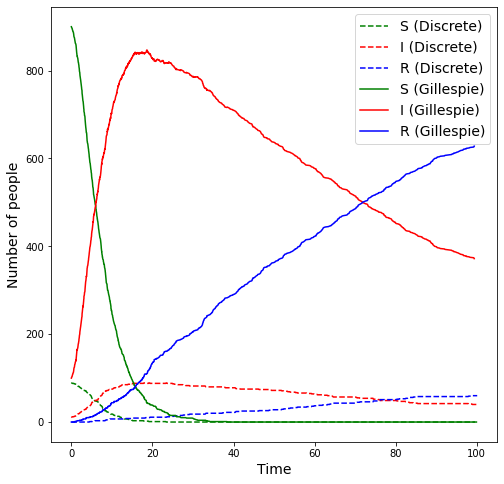

In [11]:
plt.figure()
plt.plot(t1, S1, 'g--', label='S (Discrete)')
plt.plot(t1, I1, 'r--', label='I (Discrete)')
plt.plot(t1, R1, 'b--', label='R (Discrete)')
plt.plot(t2, S2, 'g-', label='S (Gillespie)')
plt.plot(t2, I2, 'r-', label='I (Gillespie)')
plt.plot(t2, R2, 'b-', label='R (Gillespie)')
plt.xlabel("Time", fontsize=14)
plt.ylabel("Number of people", fontsize=14)
plt.legend(fontsize=14)
plt.show()

## SIS Model
In this model, once individuals heal, they may become re-infected.

In [12]:
tau = {2:0.01, 3:0.01}
gamma = 0.01
tmax = 100
dt = 1

In [ ]:
tau = {2:0.01, 3:0.01}
gamma = 0.01
start = time.time()
t1, S1, I1 = contagion.discrete_SIS(H, tau, gamma, rho = 0.1, tmin = 0, tmax=tmax, dt=dt)
print(time.time() - start)

start = time.time()
t2, S2, I2 = contagion.Gillespie_SIS(H, tau, gamma, rho = 0.1, tmin = 0, tmax=tmax)
print(time.time() - start)

In [ ]:
plt.figure()
plt.plot(t1, S1, 'g--', label='S (Discrete)')
plt.plot(t1, I1, 'r--', label='I (Discrete)')
plt.plot(t2, S2, 'g-', label='S (Gillespie)')
plt.plot(t2, I2, 'r-', label='I (Gillespie)')
plt.xlabel("Time", fontsize=14)
plt.ylabel("Number of people", fontsize=14)
plt.legend(fontsize=14)
plt.show()

## Animation of SIR model

In [ ]:
import hypernetx as hnx
import matplotlib.pyplot as plt
import random
import time
import hypernetx.algorithms.contagion as contagion
import numpy as np
from IPython.display import HTML

In [ ]:
n = 100
m = 40

hyperedgeList = [random.sample(range(n), k=random.choice([2,3])) for i in range(m)]
H = hnx.Hypergraph(hyperedgeList, static=True)

In [ ]:
tau = {2:2, 3:1}
gamma = 0.1

In [ ]:
transition_events = contagion.discrete_SIR(H, tau, gamma, rho=0.2, tmin=0, tmax=50, dt=1, return_full_data=True)

In [ ]:
for time, events in transition_events.items():
    if events != []:
        for event in events:
            if event[0] == 'R':
                print(f"At time {time}, {event[1]} recovered")
            elif event[0] == 'I' and event[2] is not None:
                print(f"At time {time}, {event[1]} was infected by {event[2]}")

In [ ]:
node_state_color_dict = {"S":"green", "I":"red", "R":"blue"}
edge_state_color_dict = {"S":(0, 1, 0, 0.3), "I":(1, 0, 0, 0.3), "R":(0, 0, 1, 0.3), "OFF": (1, 1, 1, 0)}

fps = 1

fig = plt.figure()
animation = contagion.contagion_animation(fig, H, transition_events, node_state_color_dict, edge_state_color_dict, node_radius=1, fps=fps)

In [ ]:
HTML(animation.to_jshtml())

## Animation of the SIS model

In [ ]:
transition_events = contagion.discrete_SIS(H, tau, gamma, rho=0.2, tmin=0, tmax=50, dt=1, return_full_data=True)

In [ ]:
for time, events in transition_events.items():
    if events != []:
        for event in events:
            if event[0] == 'S':
                print(f"At time {time}, {event[1]} recovered")
            elif event[0] == 'I' and event[2] is not None:
                print(f"At time {time}, {event[1]} was infected by {event[2]}")

In [ ]:
node_state_color_dict = {"S":"green", "I":"red", "R":"blue"}
edge_state_color_dict = {"S":(0, 1, 0, 0.3), "I":(1, 0, 0, 0.3), "R":(0, 0, 1, 0.3), "OFF": (1, 1, 1, 0)}

fps = 1

fig = plt.figure()
animation = contagion.contagion_animation(fig, H, transition_events, node_state_color_dict, edge_state_color_dict, node_radius=1, fps=fps)

In [ ]:
HTML(animation.to_jshtml())